In [2]:
# importig required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats 
from scipy.stats import pearsonr
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("salary .csv")
df.shape

(514, 11)

* there are 514 observations in the given dataset with 11 features

In [4]:
# checking for null values
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [5]:
# dropping of null values
salary_df = df.dropna()
salary_df.shape

(513, 11)

Split your data into a training and test set.
Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

In [6]:
# def remove_outlier(salary_df, ):
#     q1 = salary_df[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out


### Splitting the dataset into Training set and Test set


### Splitting of Data

In [7]:
# splitting data to training set and test set
# 80/20 split
yrs_worked_train,yrs_worked_test,salary_earned_train,salary_earned_test = train_test_split(salary_df.yearsworked, salary_df.salary,test_size= 103/513)

In [8]:
# basic stats of the dependant variable 
salary_earned_train.describe()


count      410.000000
mean     50637.444236
std      12798.864597
min      29000.000000
25%      40138.500000
50%      49469.000000
75%      60128.750000
max      96156.000000
Name: salary, dtype: float64

In [9]:
yrs_worked_train.describe()

count    410.000000
mean      12.873171
std        9.541494
min        0.000000
25%        4.000000
50%       12.000000
75%       22.000000
max       41.000000
Name: yearsworked, dtype: float64

### Extreme points 

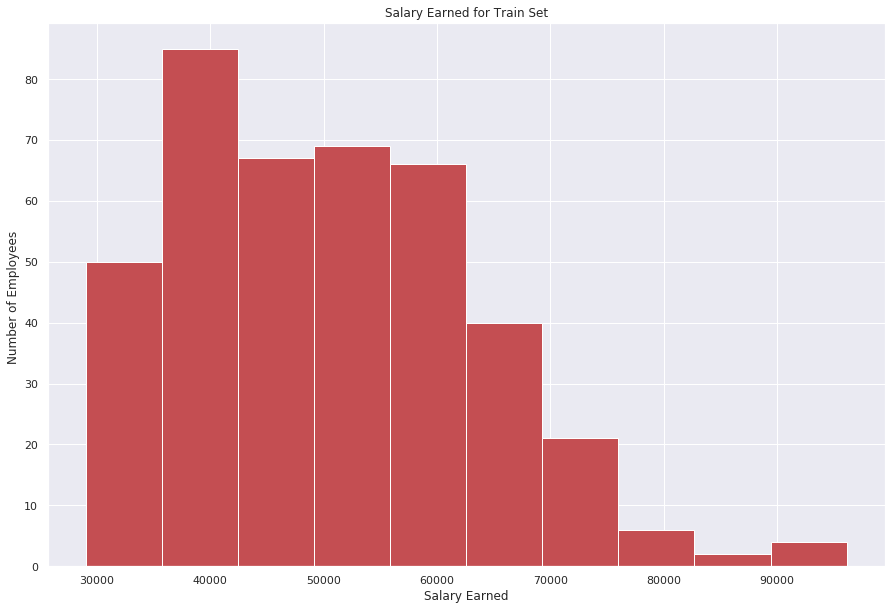

In [10]:
#histogram
sns.set()
plt.figure(figsize=(15,10))
plt.hist(salary_earned_train, color='r', stacked=False, orientation='vertical')
plt.ylabel('Number of Employees ')
plt.xlabel('Salary Earned')
plt.title('Salary Earned for Train Set')
plt.show()

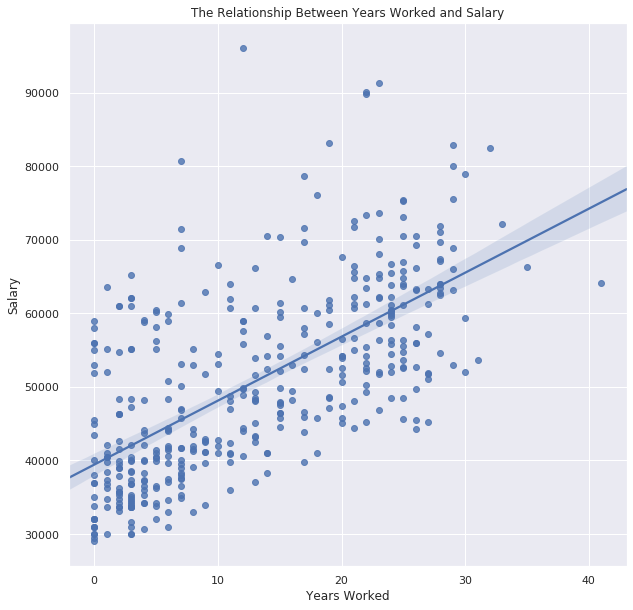

In [11]:
plt.figure(figsize=(10,10))
sns.regplot(x= yrs_worked_train, y= salary_earned_train, data=salary_df)
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('The Relationship Between Years Worked and Salary')
plt.show()

### Running a simple linear regression for salry

### Fitting Simple Linear Regression to the Training set


In [12]:
import statsmodels.formula.api as smf

yrs_worked_train = sm.add_constant(yrs_worked_train)

# create a fitted model in one line
regressor = sm.OLS(salary_earned_train, yrs_worked_train).fit()

# print the coefficients
regressor.summary()


/home/allen/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     296.8
Date:                Fri, 14 Feb 2020   Prob (F-statistic):           2.26e-50
Time:                        09:25:55   Log-Likelihood:                -4346.6
No. Observations:                 410   AIC:                             8697.
Df Residuals:                     408   BIC:                             8705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.943e+04    809.290     48.724      0.000    3.78e+04     4.1e+04
yearsworked   870.4495     50.528     17.227      0.000     771.122     969.777
==============================================================================
Omnibus:                       74.997   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.465
Skew:                           1.104   Prob(JB):                     4.21e-27
Kurtosis:                       4.496   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Adding 1 year to the time worked results in the increase of salary earned

### Dertemining weather the model significantly predicts the dependant variable

In [13]:
stats.pearsonr(yrs_worked_train,salary_earned_train)


TypeError: No loop matching the specified signature and casting was found for ufunc add



* The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0 which shows a moderate positive relationship between the two variables.

* The p_value is too small and indicates strong evidence against the null hypothesis that the relationship between the variables is statistically significant since it is smaller than the threshold of the P_value of 0.05.

### Percentage of the variance in employees’ salaries that is accounted for by the number of years they have worked

In [20]:
regressor.conf_int()

0             1
const        38169.342436  41501.855737
yearsworked    769.937170    979.561664

In [15]:
# predicting the expected salary for someone with 12years' work experience 
regressor.predict([1,12])

array([50332.59209162])

In [16]:
# predicting the expected salary for someone with 80 years work experience
regressor.predict([1,80])

array([109815.55245323])

In [17]:
# #histogram
# sns.set()
# plt.figure(figsize=(15,10))
# plt.hist(yrs_worked_train, color= "r", stacked=False, orientation='vertical')
# plt.ylabel('Number of Employees ')
# plt.xlabel('Salary Earned')
# plt.title('Salary Earned for Train Set')
# plt.show()

In [18]:
# creating a vector to predict the dependant variable Test set
# yrs_worked_predictor= regressor.predict(yrs_worked_test)
#

In [19]:

tanza_data['Age_bins'] = pd.cut(x = tanza_data['Age'],bins= [10000, 19000, 29000, 39000, 49000, 59000, 69000, 79000, 89000, 99000, 109000, 119000])
plt.figure(figsize=(20,20))
sns.catplot(x='Age_bins',hue= 'mobile_money_classification', kind='count', data=tanza_data)

NameError: name 'tanza_data' is not defined